#                                                        Titanic Survival Analysis

### **Titanic** is one of the most infamous shipwrecks in history. The Titanic wasn't just a ship - it was a floating city carrying lives. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

### This Project takes a closer look at the story behind the Titanic disaster using the Titanic dataset from kaggle through **Exploratory Data Analysis (EDA)**
### The goal is to uncover how factors like age, gender, passenger class, and family size influenced the chances of survival. This Analysis tells a story not just of numbers, but of people and the circumstances that decided their fate on that fateful night.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

### Let's start by reading the Titanic-Dataset.csv file into Pandas Dataframe

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Data: We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

### Most columns are complete, only **Age: 177**, **Cabin: 687**, and **Embarked: 2** have missing values.

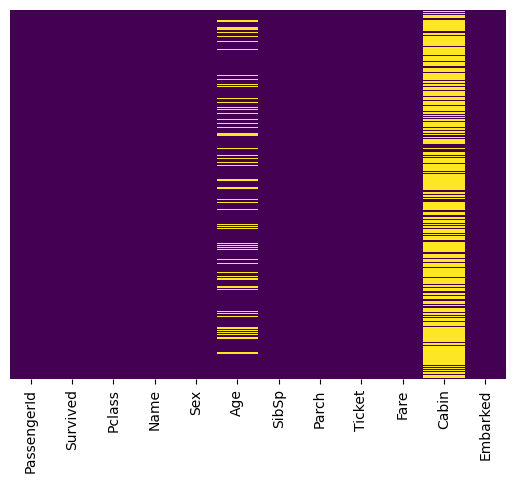

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False,
            cmap = 'viridis')

plt.savefig('heatmap.png')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Roughly 20 percent of the age is missing. The proportion of age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the cabin column, it looks like we are just missing too much of that data to do something useful with a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Text(0.5, 1.0, 'Titanic Survival Distribution')

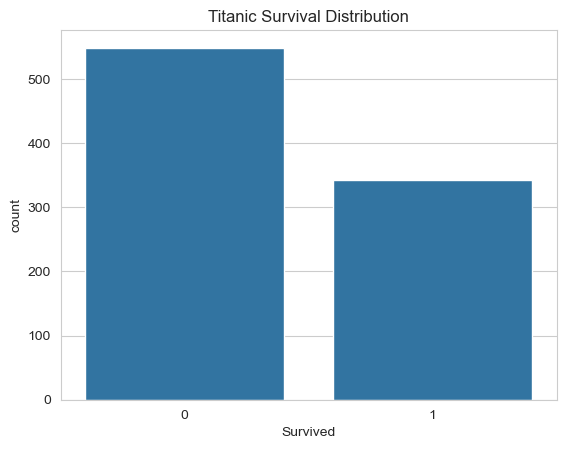

In [10]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df)
plt.title('Titanic Survival Distribution')

### This Graph clearly shows that more Passengers did not Survived (0) compared to those who Survived (1). This highlights the tragic reality that the majority of people onboard lost their lives

### Let's now explore Survival based on different features like gender, class, and age to understand this imbalance better!

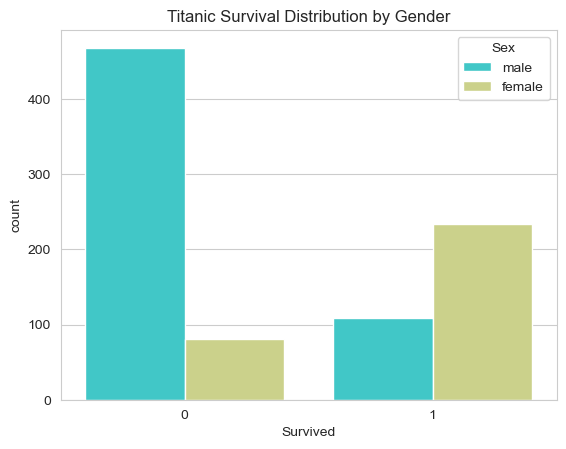

In [11]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived', hue ='Sex', data = df, palette = 
              'rainbow')
plt.title('Titanic Survival Distribution by Gender')
plt.savefig('countplot.png')

### This Graph shows that most men couldn't survive, while women had much  higher survival chances. This reflects the 'Women and Children First' policy followed during the tragedy. This shows that survival chances were strongly influenced by gender.

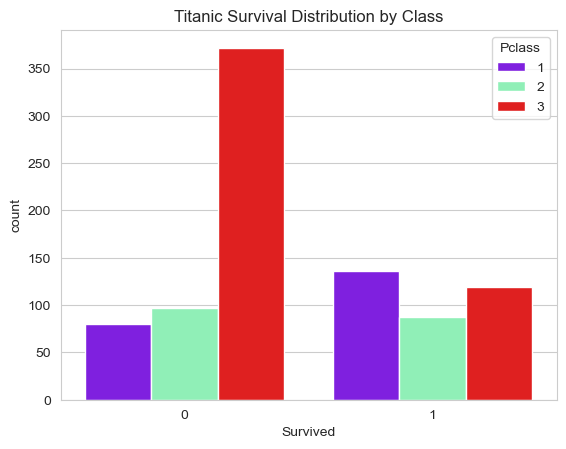

In [12]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Pclass',data=df, palette =
              'rainbow')
plt.title('Titanic Survival Distribution by Class')
plt.savefig('countplot2.png')

### This graph clearly shows that passengers in Class 1 had much higher Survival chances compared to those in Class 3. For Class 2, the situation was almost balanced, with Survival and death rates being nearly the same. This Shows how social class significantly influenced survival on the Titanic.

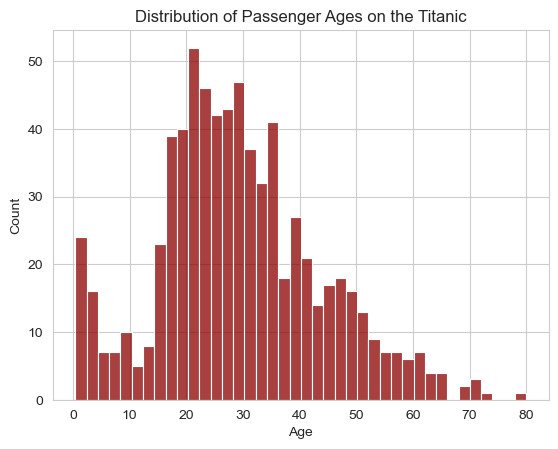

In [13]:
sns.histplot(df['Age'].dropna(), kde = False, color = 'darkred'
             , bins = 40)
plt.title('Distribution of Passenger Ages on the Titanic')
plt.savefig('histplot_Age.png')

### This graph indicates that most of the Titanic Passengers were quite young, with the largest group falling between 20-30 years of age. 

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18856\4027430589.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = 'SibSp', data = df, palette = 'rainbow')


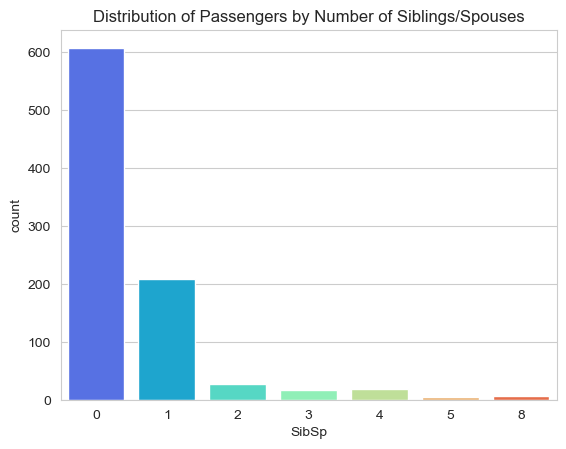

In [14]:
sns.countplot( x = 'SibSp', data = df, palette = 'rainbow')
plt.title('Distribution of Passengers by Number of Siblings/Spouses')
plt.savefig('countplot_SibSp.png')

### Most of the Titanic passengers were traveling alone without siblings or spouses (SibSp = 0), A smaller group travelled with one companion (SibSp = 1), while very few had larger families abroad. This suggests that solo travelers formed majority around 600 passengers were solo travellers.

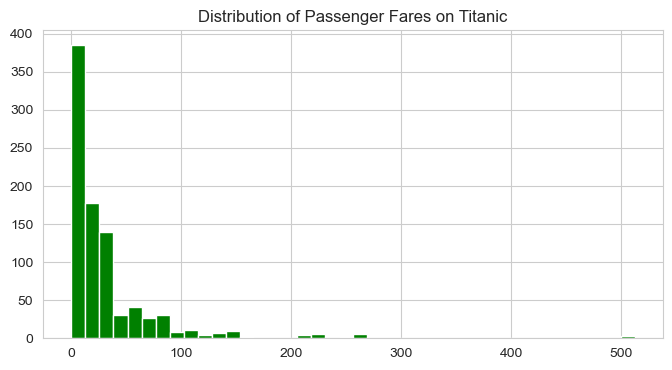

In [15]:
df['Fare'].hist( color = 'green', bins = 40, figsize = (8,4))
plt.title('Distribution of Passenger Fares on Titanic')
plt.savefig('hist_Fare.png')

### This graph shows that most of the passengers paid very low fares (under 50), while only a few paid extremely high fares (above 200). This indicates that majority of travelers belonged to lower fare classes means (3rd Class)

# Data cleaning

### We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers(imputation). However we can be smarter about this and check the average age by passenger class

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18856\1866377513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x = 'Pclass', y = 'Age', data = df, palette =


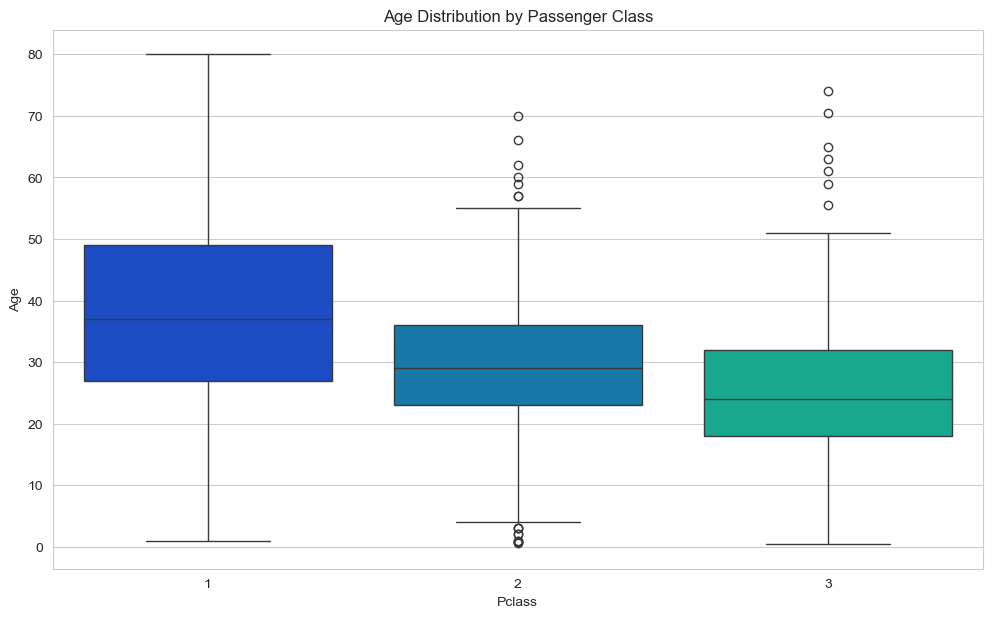

In [16]:
plt.figure(figsize = (12,7))
sns.boxplot( x = 'Pclass', y = 'Age', data = df, palette = 
             'winter')
plt.title('Age Distribution by Passenger Class')
plt.savefig('boxplot_Age.png')

### We can see the wealthier passengers in the higher class tent to be older, with the median age around 40, which makes sense. 3rd Class had the youngest group of passengers. We'll use these average age values to impute based on Pclass for Age.

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [18]:
# Apply that func
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis = 1)

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18856\3438464256.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18856\3438464256.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


### Here I filled the missing **Age** values using the median of each Pclass because age distribution is different across classes. 
### Filled 1st class with 37 years, 2nd class with 29 years, 3rd class with 24 years

<Axes: >

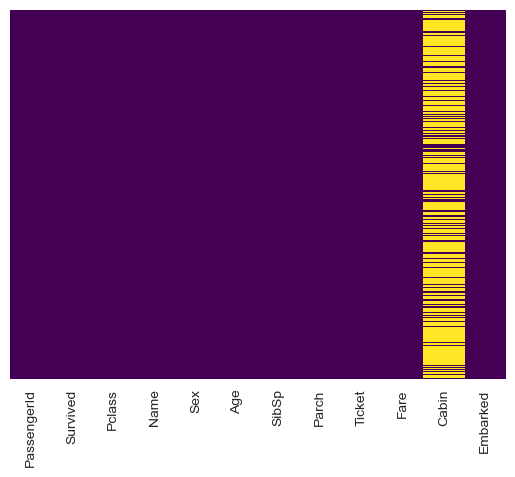

In [19]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False,
            cmap = 'viridis')

In [20]:
df.drop('Cabin', axis = 1, inplace = True)

### The Cabin column had too many missing values. so instead of filling it with guesses, I dropped it

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
df.dropna(inplace = True)

### Converting Categorical Features

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
df.shape

(889, 8)

In [27]:
X = df.drop('Survived', axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [28]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
X.shape

(889, 7)

In [30]:
y.shape

(889,)

In [31]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [32]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [33]:
X_encoded = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True, dtype = int)

In [34]:
X_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [35]:
X_encoded.shape

(889, 8)

In [36]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Fare        889 non-null    float64
 5   Sex_male    889 non-null    int64  
 6   Embarked_Q  889 non-null    int64  
 7   Embarked_S  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [39]:
X_train.shape

(711, 8)

In [40]:
X_test.shape

(178, 8)

In [41]:
y_train.shape

(711,)

In [42]:
y_test.shape

(178,)

In [43]:
y_train.value_counts(normalize = True)

Survived
0    0.61744
1    0.38256
Name: proportion, dtype: float64

In [44]:
y_test.value_counts(normalize = True)

Survived
0    0.617978
1    0.382022
Name: proportion, dtype: float64

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr_model = LogisticRegression(max_iter=1000)

In [47]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_pred = lr_model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [50]:
accuracy

0.8258426966292135

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[99, 11],
       [20, 48]])

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.81      0.71      0.76        68

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178



#### Model is conservative:

- It prefers saying “died” unless strongly convinced

- This is NORMAL for Logistic Regression on imbalanced data

This is not a failure.
This is expected behavior.

In [53]:
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lr_model.coef_[0]
}).sort_values(by="coefficient", ascending=False)

coef_df

,feature,coefficient
6,Embarked_Q,0.276972
4,Fare,0.002506
1,Age,-0.039109
3,Parch,-0.088725
2,SibSp,-0.252898
7,Embarked_S,-0.295495
0,Pclass,-1.088355
5,Sex_male,-2.547035


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth = 4,
    min_samples_split = 5
)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=5, random_state=42)

In [57]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0])

In [58]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8202247191011236

In [59]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[103,   7],
       [ 25,  43]])

In [60]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       110
           1       0.86      0.63      0.73        68

    accuracy                           0.82       178
   macro avg       0.83      0.78      0.80       178
weighted avg       0.83      0.82      0.81       178

